In [1]:
import cluster_images.convert as convert
import cluster_images.hog as hog
import cluster_images.neural as neural

2022-12-05 23:13:05.408538: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
# create hog descriptors of a dataset
ds = convert.load_dataset()
hog_descriptors = convert.normalise_features(hog.create_HOG_descriptors(ds))

Found 4700 files belonging to 45 classes.


2022-12-05 23:13:19.822526: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
# create neural descriptors of a dataset
neural_descriptors = convert.normalise_features(neural.create_neural_descriptors(ds))

In [4]:
# reduce hog descriptors via PCA and LLE
hog_PCA = convert.reduce_with_PCA(hog_descriptors, n_components=50)
hog_LLE = convert.reduce_with_LLE(hog_descriptors)

In [5]:
# reduce neural descriptors via PCA and LLE
neural_PCA = convert.reduce_with_PCA(neural_descriptors, n_components=50)
neural_LLE = convert.reduce_with_LLE(neural_descriptors)

In [7]:
# Apply KMeans Clustering to hog descriptors
hog_PCA_kmeans, hog_PCA_clustering = convert.KMeans_clustering(hog_PCA)
hog_LLE_kmeans, hog_LLE_clustering = convert.KMeans_clustering(hog_LLE)

In [8]:
# Apply KMeans Clustering to neural descriptors
neural_PCA_kmeans, neural_PCA_clustering = convert.KMeans_clustering(neural_PCA)
neural_LLE_kmeans, neural_LLE_clustering = convert.KMeans_clustering(neural_LLE)

Applying a KMeans Elbow test by computing cluster distortions.
Input Size: (4700, 50)	 Cluster Range to test: (2, 100)


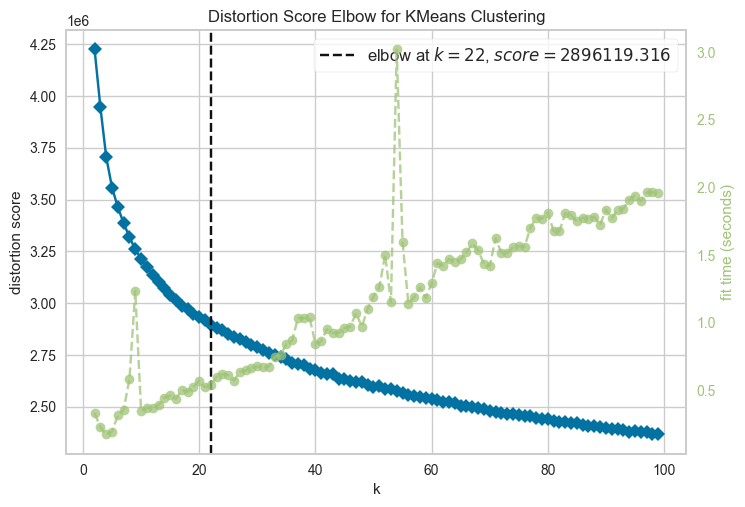

Applying a KMeans Elbow test by computing cluster distortions.
Input Size: (4700, 50)	 Cluster Range to test: (2, 100)


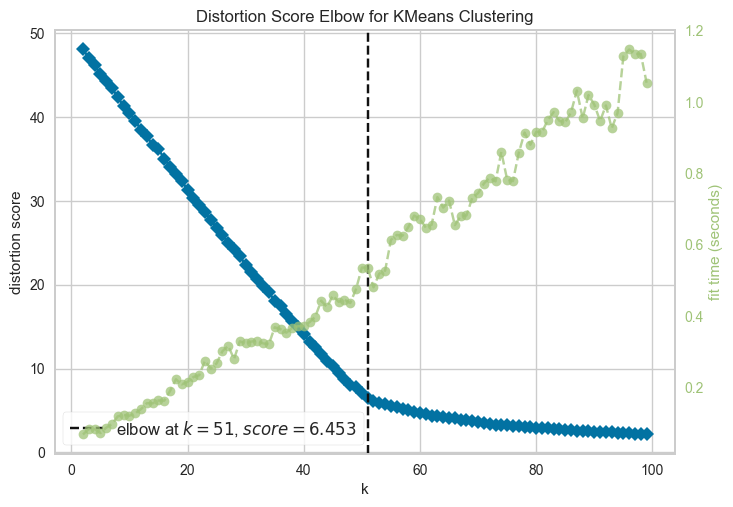

In [10]:
# Visualise, with an elbow test, goodness of clustering
convert.KMeans_Elbow(hog_PCA, (2,100))
convert.KMeans_Elbow(hog_LLE, (2,100))

Applying a KMeans Elbow test by computing cluster distortions.
Input Size: (4700, 50)	 Cluster Range to test: (2, 100)


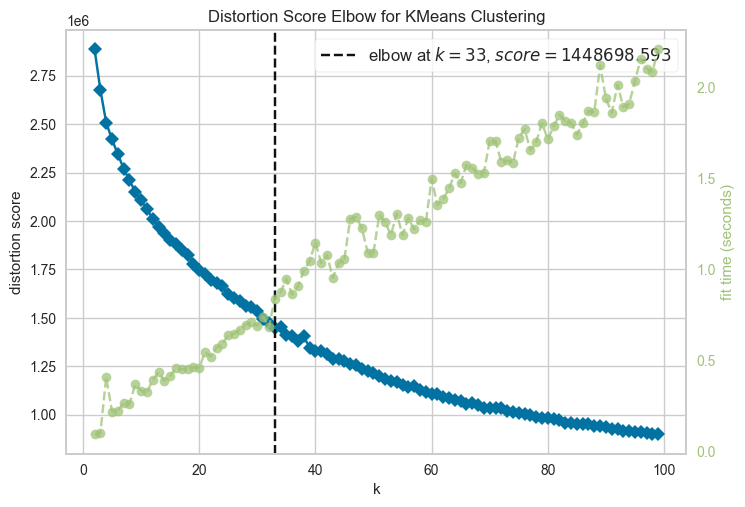

Applying a KMeans Elbow test by computing cluster distortions.
Input Size: (4700, 50)	 Cluster Range to test: (2, 100)


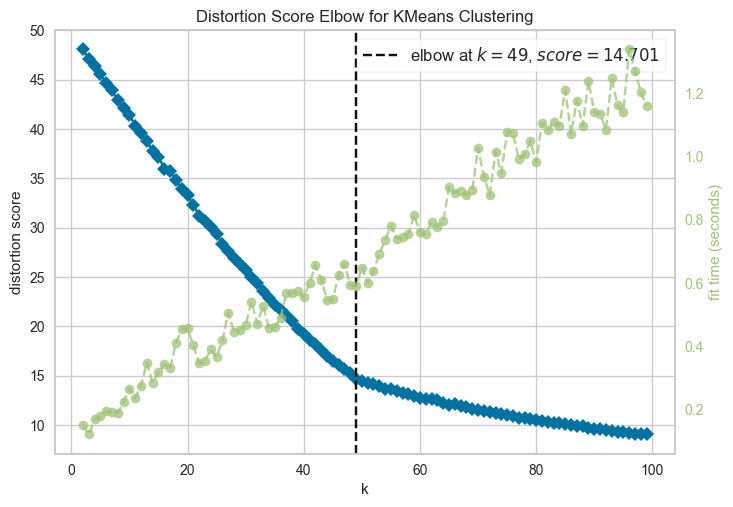

In [11]:
convert.KMeans_Elbow(neural_PCA, (2,100))
convert.KMeans_Elbow(neural_LLE, (2,100))